## Modules and classes

#### Qa Load and test the `libitmal` module
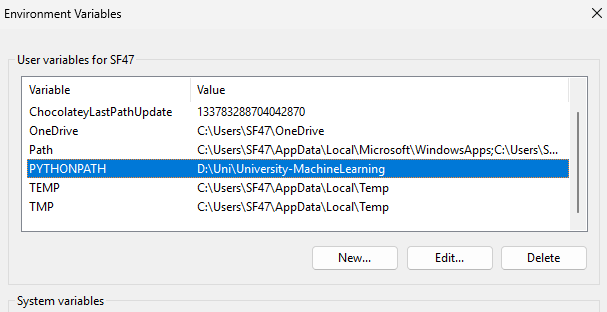


#### Qb Create your own module, with some functions, and test it

In [2]:
import sys
import os

sys.path.append(os.getcwd())
from mymodule import utils as myutils

print(f"Module location: {myutils.__file__}")

# Test functions
print("\nTesting my functions:")
print(myutils.say_hello("Omar"))
print(f"5 + 7 = {myutils.add_numbers(5, 7)}")

matrix = myutils.create_matrix(2, 3)
print(f"Created matrix:\n{matrix}")

# Run tests
myutils.test_my_functions()

print("\nSimple module works.")

Module location: d:\Uni\University-MachineLearning\L01\mymodule\utils.py

Testing my functions:
Hello Omar!
5 + 7 = 12
Created matrix:
[[1. 1. 1.]
 [1. 1. 1.]]
Testing my simple module:
Greeting: Hello ML Student!
Adding 5 + 3 = 8
Matrix:
[[1. 1.]
 [1. 1.]
 [1. 1.]]

Simple module works.


#### Qc How do you 'recompile' a module?

In [ ]:
import importlib
import sys
import os

sys.path.append(os.getcwd())
from mymodule import utils as myutils

print("Before reload:")
print(myutils.say_hello("Test"))

# Method 1: importlib.reload() - most common
print("\nReloading module...")
myutils = importlib.reload(myutils)
print("After reload:")
print(myutils.say_hello("Test - Updated"))

# Method 2: Jupyter - automatic reloading
print("\nFor automatic reloading, use:")
print("%load_ext autoreload")
print("%autoreload 2")

%load_ext autoreload
%autoreload 2


Before reload:
Hello Test!

Reloading module...
My simple module loaded!
After reload:
Hello Test - Updated!

For automatic reloading, use:
%load_ext autoreload
%autoreload 2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Why used:
```python
myutils = importlib.reload(myutils)
```
Explination: Used because you have to reassign the variable after reload for it to work.

#### [OPTIONAL] Qd Write a Howto on Python Modules a Packages

In [1]:
# Solution for Qd: Python Modules and Packages Howto

# Directory structure:
# mymodule/
#   __init__.py (makes it a package)  
#   utils.py (module with functions)

# Import methods:
import sys
import os
sys.path.append(os.getcwd())  # Add current directory to path
from mymodule import utils    # Import module

print("Module imported")
print("Functions:", [f for f in dir(utils) if not f.startswith('_')])

MyModule package loaded successfully!
My simple module loaded!
Module imported
Functions: ['add_numbers', 'create_matrix', 'np', 'say_hello', 'test_my_functions']


#### Qe Extend the class with some public and private functions and member variables

In [19]:
# Solution for Qe: Public/Private functions and self

class MyClass:
    def __init__(self):
        self.public_var = "public"        # Public variable
        self._protected_var = "protected" # Protected (convention)
        self.__private_var = "private"    # Private (name mangling)
    
    def public_method(self):
        """Public method"""
        return "This is public"
    
    def _protected_method(self):
        """Protected method (convention)"""
        return "This is protected"
    
    def __private_method(self):
        """Private method (name mangled)"""
        return "This is private"

# Test the class
obj = MyClass()

# What is 'self'?
print("'self' refers to the instance of the class")

# Test access from outside
print(f"Public: {obj.public_method()}")
print(f"Protected: {obj._protected_method()}")

# Private method access (will fail)
try:
    print(f"Private: {obj.__private_method()}")
except AttributeError as e:
    print(f"Private method error: {e}")

# What happens without 'self'?
class BadClass:
    def method_without_self():  # Missing self
        return "This will fail"

bad_obj = BadClass()
try:
    result = bad_obj.method_without_self()
except TypeError as e:
    print(f"Error without 'self': {e}")

'self' refers to the instance of the class
Public: This is public
Protected: This is protected
Private method error: 'MyClass' object has no attribute '__private_method'
Error without 'self': BadClass.method_without_self() takes 0 positional arguments but 1 was given


#### Qf Extend the class with a Constructor

In [21]:
# Solution for Qf: Constructor and Destructor

class MyClassWithConstructor:
    def __init__(self, name, value=0):
        """Constructor - called when object is created"""
        self.name = name
        self.value = value
        print(f"Object {self.name} created with value {self.value}")
    
    def __del__(self):
        """Destructor - called when object is garbage collected"""
        print(f"Object {self.name} is being destroyed")

# Test constructor
obj1 = MyClassWithConstructor("test1", 42)
obj2 = MyClassWithConstructor("test2")

print(f"obj1.name: {obj1.name}, obj1.value: {obj1.value}")

# Python destructor notes:
print("\nPython has garbage collection:")
print("- __del__ is called when object is garbage collected")
print("- You rarely need to implement __del__")
print("- Python handles memory management automatically")

# Destructor called when objects go out of scope
obj1.__del__() 
print("obj1 deleted manually")

Object test1 created with value 42
Object test2 created with value 0
Object test2 is being destroyed
obj1.name: test1, obj1.value: 42

Python has garbage collection:
- __del__ is called when object is garbage collected
- You rarely need to implement __del__
- Python handles memory management automatically
Object test1 is being destroyed
obj1 deleted manually


#### Qg Extend the class with a to-string function

In [3]:
# Solution for Qg: String representation (__str__ and __repr__)

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        """String representation for users (readable)"""
        return f"{self.name}, {self.age} years old"
    
    def __repr__(self):
        """String representation for developers (unambiguous)"""
        return f"Person('{self.name}', {self.age})"

# Test string representations
person = Person("Alice", 25)

print("Using print() calls __str__:")
print(person)

print("\nUsing repr() calls __repr__:")
print(repr(person))

print("\nString conversion:")
print(f"str(person): {str(person)}")
print(f"repr(person): {repr(person)}")

# Without __str__, __repr__ is used as fallback
class SimpleClass:
    def __init__(self, value):
        self.value = value
    
    def __repr__(self):
        return f"SimpleClass({self.value})"

simple = SimpleClass(42)
print(f"\nWithout __str__, print uses __repr__: {simple}")

Using print() calls __str__:
Alice, 25 years old

Using repr() calls __repr__:
Person('Alice', 25)

String conversion:
str(person): Alice, 25 years old
repr(person): Person('Alice', 25)

Without __str__, print uses __repr__: SimpleClass(42)
